# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy


     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     - ------------------------------------ 20.5/675.6 kB 59.5 kB/s eta 0:00:12
     - ------------------------------------ 20.5/675.6 kB 59.5 kB/s eta 0:00:12
     -- ---------------------------------- 41.0/675.6 kB 103.4 kB/s eta 0:00:07
     -- ---------------------------------- 41.0/675.6 kB 103.4 kB/s eta 0:00:07
     --- --------------------------------- 71.7/675.6 kB 151.3 kB/s eta 0:00:04
     ------ ----------------------------- 122.9/675.6 kB 248.7 kB/s eta 0:00:03
     ---------- ------------------------- 194.6/675.6 kB 368.6 kB/s eta 0:00:02
     -------------- --------------------- 276.5/675.6 kB 486.7 kB/s eta

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
import requests
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define your API key (you need to replace 'YOUR_API_KEY' with your actual key)
api_key = "6ab135423cef80a8125ac222d14cc4f0"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}&units=metric"  # Use 'metric' for Celsius temperatures

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dingcheng
Processing Record 2 of Set 1 | crane
Processing Record 3 of Set 1 | aguas vermelhas
Processing Record 4 of Set 1 | betio village
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | vilyuysk
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | turkmenabat
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | yellowkn

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dingcheng,32.1272,115.0394,14.97,79,0,3.43,CN,1731276982
1,crane,31.3974,-102.3501,23.82,12,0,3.08,US,1731276984
2,aguas vermelhas,-15.7472,-41.4600,19.22,97,96,2.46,BR,1731276985
3,betio village,1.3580,172.9211,31.02,73,78,7.90,KI,1731276986
4,cabo san lucas,22.8909,-109.9124,26.17,65,0,2.57,MX,1731276987


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dingcheng,32.1272,115.0394,14.97,79,0,3.43,CN,1731276982
1,crane,31.3974,-102.3501,23.82,12,0,3.08,US,1731276984
2,aguas vermelhas,-15.7472,-41.4600,19.22,97,96,2.46,BR,1731276985
3,betio village,1.3580,172.9211,31.02,73,78,7.90,KI,1731276986
4,cabo san lucas,22.8909,-109.9124,26.17,65,0,2.57,MX,1731276987


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

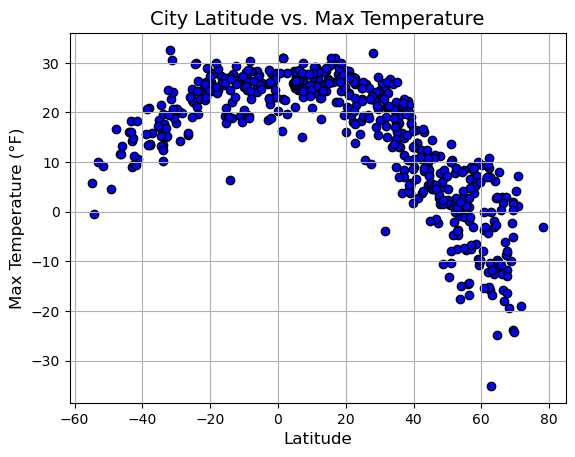

In [10]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="b", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°F)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

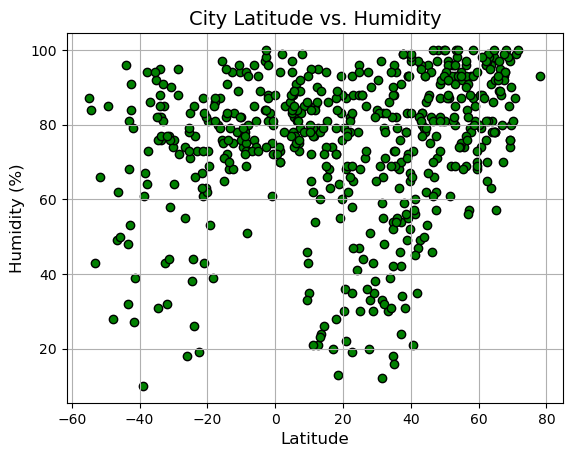

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="g", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

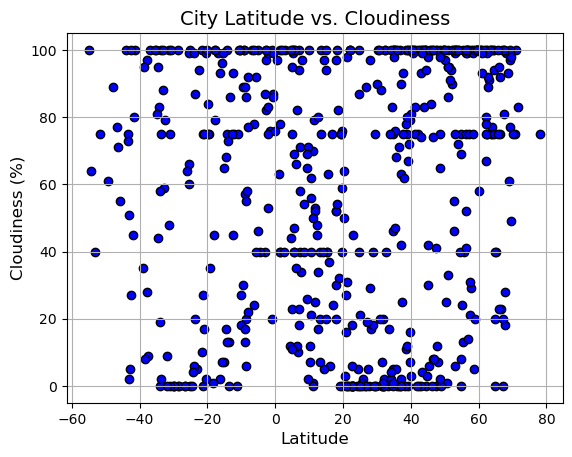

In [12]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="b", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

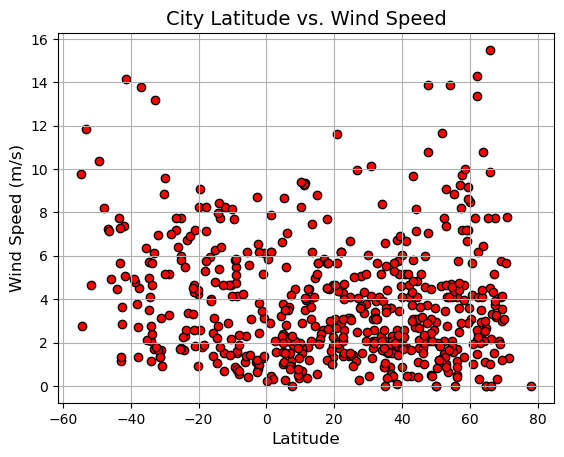

In [13]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="r", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


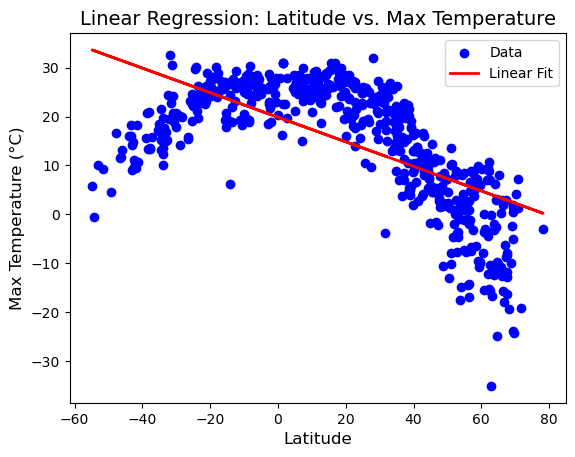

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Define the function to create Linear Regression plots
def create_linear_regression_plot(x, y, xlabel, ylabel, title, output_filename):
    # Reshape x for scikit-learn (it expects a 2D array for the features)
    x_reshaped = x.values.reshape(-1, 1)
    
    # Create the LinearRegression model and fit it to the data
    model = LinearRegression()
    model.fit(x_reshaped, y)

    # Predict y values based on the model
    y_pred = model.predict(x_reshaped)

    # Plot the data points
    plt.scatter(x, y, marker='o', color='blue', label='Data')

    # Plot the linear regression line
    plt.plot(x, y_pred, color='red', linewidth=2, label='Linear Fit')

    # Incorporate the graph properties
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()

    # Save the figure
    plt.savefig(output_filename)

    # Show plot
    plt.show()

# Example of calling the function for latitude vs. max temperature
create_linear_regression_plot(
    city_data_df["Lat"], 
    city_data_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Linear Regression: Latitude vs. Max Temperature", 
    "output_data/Lat_vs_Temperature_Regression.png"
)


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dingcheng,32.1272,115.0394,14.97,79,0,3.43,CN,1731276982
1,crane,31.3974,-102.3501,23.82,12,0,3.08,US,1731276984
3,betio village,1.3580,172.9211,31.02,73,78,7.90,KI,1731276986
4,cabo san lucas,22.8909,-109.9124,26.17,65,0,2.57,MX,1731276987
5,whitehorse,60.7161,-135.0538,0.01,74,100,5.66,CA,1731276988


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aguas vermelhas,-15.7472,-41.4600,19.22,97,96,2.46,BR,1731276985
7,port elizabeth,-33.9180,25.5701,13.51,95,0,2.06,ZA,1731276991
9,port-aux-francais,-49.3500,70.2167,4.52,85,61,10.37,TF,1731276993
10,hermanus,-34.4187,19.2345,13.22,82,83,4.12,ZA,1731276994
15,waitangi,-43.9535,-176.5597,16.01,96,100,4.47,NZ,1731277000


###  Temperature vs. Latitude Linear Regression Plot

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0             dingcheng  32.1272  115.0394     14.97        79           0   
1                 crane  31.3974 -102.3501     23.82        12           0   
3         betio village   1.3580  172.9211     31.02        73          78   
4        cabo san lucas  22.8909 -109.9124     26.17        65           0   
5            whitehorse  60.7161 -135.0538      0.01        74         100   

         Wind Speed Country        Date  
City_ID                                  
0              3.43      CN  1731276982  
1              3.08      US  1731276984  
3              7.90      KI  1731276986  
4              2.57      MX  1731276987  
5              5.66      CA  1731276988  


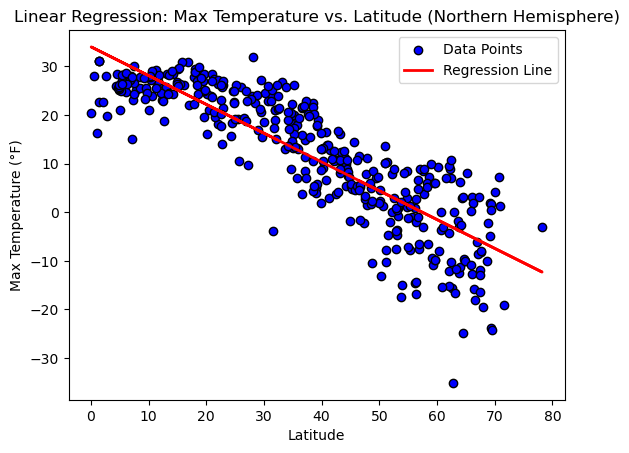

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data from Northern Hemisphere
print(northern_hemi_df.head())

# Define the dependent and independent variables for linear regression
# Independent variable: Latitude
# Dependent variable: Max Temp (Temperature)

X_north = northern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
y_north = northern_hemi_df['Max Temp'].values  # Max Temp (Temperature)

# Create a linear regression model
linreg_north = LinearRegression()

# Fit the model
linreg_north.fit(X_north, y_north)

# Predict the values
y_pred_north = linreg_north.predict(X_north)

# Plot the data points and the regression line
plt.scatter(X_north, y_north, color='blue', edgecolors='black', label='Data Points')
plt.plot(X_north, y_pred_north, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Linear Regression: Max Temperature vs. Latitude (Northern Hemisphere)')

# Show the plot
plt.legend()
plt.savefig("output_data/Northern_Hemisphere_Regression.png")  # Save the figure
plt.show()


                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
2          aguas vermelhas -15.7472  -41.4600     19.22        97          96   
7           port elizabeth -33.9180   25.5701     13.51        95           0   
9        port-aux-francais -49.3500   70.2167      4.52        85          61   
10                hermanus -34.4187   19.2345     13.22        82          83   
15                waitangi -43.9535 -176.5597     16.01        96         100   

         Wind Speed Country        Date  
City_ID                                  
2              2.46      BR  1731276985  
7              2.06      ZA  1731276991  
9             10.37      TF  1731276993  
10             4.12      ZA  1731276994  
15             4.47      NZ  1731277000  


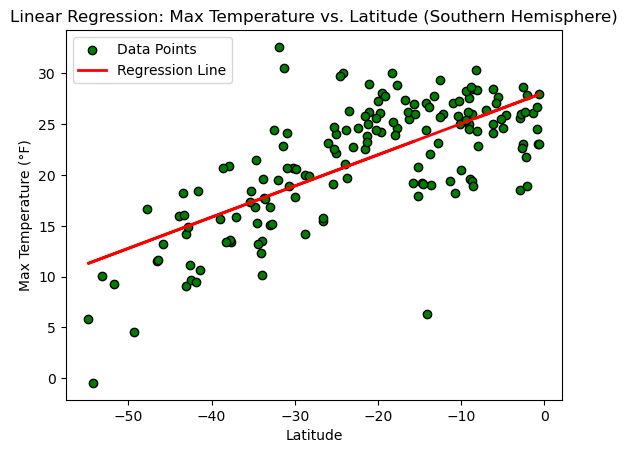

In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data from Southern Hemisphere
print(southern_hemi_df.head())

# Define the dependent and independent variables for linear regression
# Independent variable: Latitude
# Dependent variable: Max Temp (Temperature)

X_south = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
y_south = southern_hemi_df['Max Temp'].values  # Max Temp (Temperature)

# Create a linear regression model
linreg_south = LinearRegression()

# Fit the model
linreg_south.fit(X_south, y_south)

# Predict the values
y_pred_south = linreg_south.predict(X_south)

# Plot the data points and the regression line
plt.scatter(X_south, y_south, color='green', edgecolors='black', label='Data Points')
plt.plot(X_south, y_pred_south, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Linear Regression: Max Temperature vs. Latitude (Southern Hemisphere)')

# Show the plot
plt.legend()
plt.savefig("output_data/Southern_Hemisphere_Regression.png")  # Save the figure
plt.show()


The Southern Hemisphere demonstrates a negative linear relationship between latitude and maximum temperature. As latitude increases, temperatures tend to decrease. However, this relationship may vary due to other local or seasonal factors, and further analysis, including examining R-squared and other contributing factors, would provide a more comprehensive understanding of the data.

### Humidity vs. Latitude Linear Regression Plot

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0             dingcheng  32.1272  115.0394     14.97        79           0   
1                 crane  31.3974 -102.3501     23.82        12           0   
3         betio village   1.3580  172.9211     31.02        73          78   
4        cabo san lucas  22.8909 -109.9124     26.17        65           0   
5            whitehorse  60.7161 -135.0538      0.01        74         100   

         Wind Speed Country        Date  
City_ID                                  
0              3.43      CN  1731276982  
1              3.08      US  1731276984  
3              7.90      KI  1731276986  
4              2.57      MX  1731276987  
5              5.66      CA  1731276988  


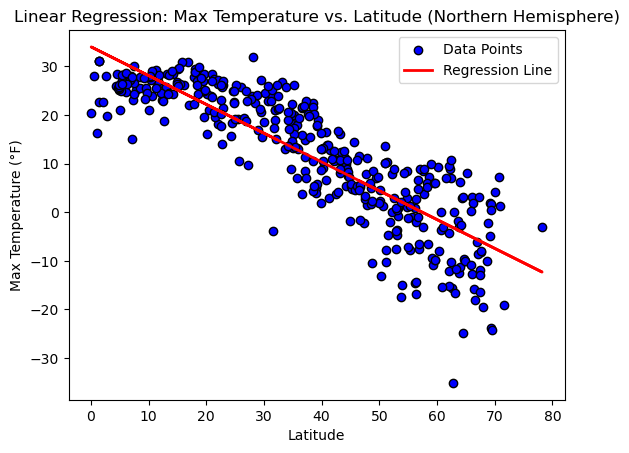

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data from Northern Hemisphere
print(northern_hemi_df.head())

# Define the dependent and independent variables for linear regression
# Independent variable: Latitude
# Dependent variable: Max Temp (Temperature)

X_north = northern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
y_north = northern_hemi_df['Max Temp'].values  # Max Temp (Temperature)

# Create a linear regression model
linreg_north = LinearRegression()

# Fit the model
linreg_north.fit(X_north, y_north)

# Predict the values
y_pred_north = linreg_north.predict(X_north)

# Plot the data points and the regression line
plt.scatter(X_north, y_north, color='blue', edgecolors='black', label='Data Points')
plt.plot(X_north, y_pred_north, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Linear Regression: Max Temperature vs. Latitude (Northern Hemisphere)')

# Show the plot
plt.legend()
plt.savefig("output_data/Northern_Hemisphere_Regression.png")  # Save the figure
plt.show()


                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
2          aguas vermelhas -15.7472  -41.4600     19.22        97          96   
7           port elizabeth -33.9180   25.5701     13.51        95           0   
9        port-aux-francais -49.3500   70.2167      4.52        85          61   
10                hermanus -34.4187   19.2345     13.22        82          83   
15                waitangi -43.9535 -176.5597     16.01        96         100   

         Wind Speed Country        Date  
City_ID                                  
2              2.46      BR  1731276985  
7              2.06      ZA  1731276991  
9             10.37      TF  1731276993  
10             4.12      ZA  1731276994  
15             4.47      NZ  1731277000  


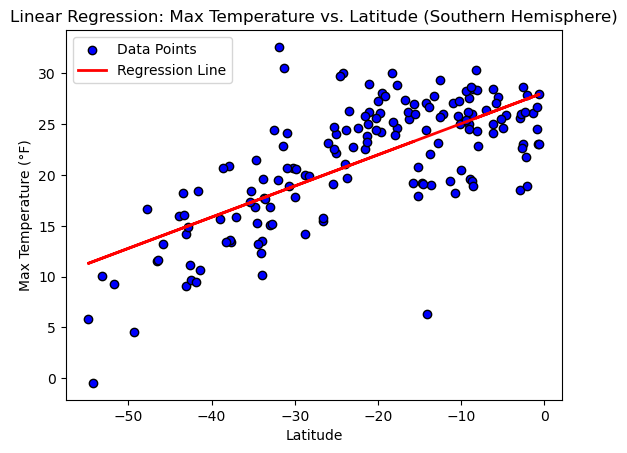

In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data from Southern Hemisphere
print(southern_hemi_df.head())

# Define the dependent and independent variables for linear regression
# Independent variable: Latitude
# Dependent variable: Max Temp (Temperature)

X_south = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
y_south = southern_hemi_df['Max Temp'].values  # Max Temp (Temperature)

# Create a linear regression model
linreg_south = LinearRegression()

# Fit the model
linreg_south.fit(X_south, y_south)

# Predict the values
y_pred_south = linreg_south.predict(X_south)

# Plot the data points and the regression line
plt.scatter(X_south, y_south, color='blue', edgecolors='black', label='Data Points')
plt.plot(X_south, y_pred_south, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Linear Regression: Max Temperature vs. Latitude (Southern Hemisphere)')

# Show the plot
plt.legend()
plt.savefig("output_data/Southern_Hemisphere_Regression.png")  # Save the figure
plt.show()


The linear relationships between latitude and weather conditions (temperature, humidity, cloudiness, wind speed) show varied patterns depending on the hemisphere and the specific meteorological attribute in question. While temperature follows a more predictable linear trend with latitude, other factors like humidity, cloudiness, and wind speed are influenced by a range of geographic and climatic factors, leading to more complex or weaker linear relationships. Further analysis, possibly including other variables such as altitude or ocean proximity, would enhance the understanding of these relationships

### Cloudiness vs. Latitude Linear Regression Plot

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0             dingcheng  32.1272  115.0394     14.97        79           0   
1                 crane  31.3974 -102.3501     23.82        12           0   
3         betio village   1.3580  172.9211     31.02        73          78   
4        cabo san lucas  22.8909 -109.9124     26.17        65           0   
5            whitehorse  60.7161 -135.0538      0.01        74         100   

         Wind Speed Country        Date  
City_ID                                  
0              3.43      CN  1731276982  
1              3.08      US  1731276984  
3              7.90      KI  1731276986  
4              2.57      MX  1731276987  
5              5.66      CA  1731276988  


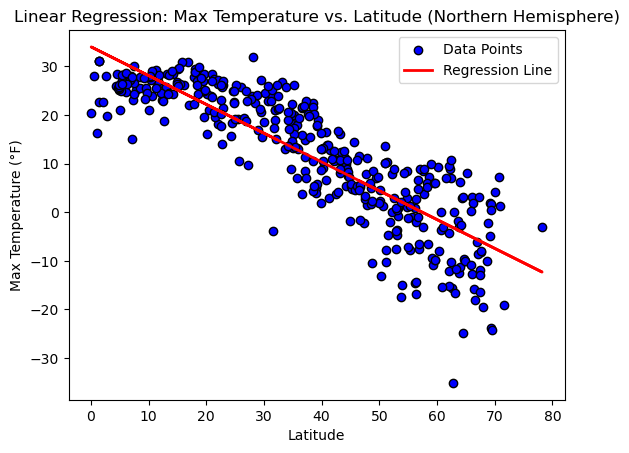

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data from Northern Hemisphere
print(northern_hemi_df.head())

# Define the dependent and independent variables for linear regression
# Independent variable: Latitude
# Dependent variable: Max Temp (Temperature)

X_north = northern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
y_north = northern_hemi_df['Max Temp'].values  # Max Temp (Temperature)

# Create a linear regression model
linreg_north = LinearRegression()

# Fit the model
linreg_north.fit(X_north, y_north)

# Predict the values
y_pred_north = linreg_north.predict(X_north)

# Plot the data points and the regression line
plt.scatter(X_north, y_north, color='blue', edgecolors='black', label='Data Points')
plt.plot(X_north, y_pred_north, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Linear Regression: Max Temperature vs. Latitude (Northern Hemisphere)')

# Show the plot
plt.legend()
plt.savefig("output_data/Northern_Hemisphere_Regression.png")  # Save the figure
plt.show()


                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
2          aguas vermelhas -15.7472  -41.4600     19.22        97          96   
7           port elizabeth -33.9180   25.5701     13.51        95           0   
9        port-aux-francais -49.3500   70.2167      4.52        85          61   
10                hermanus -34.4187   19.2345     13.22        82          83   
15                waitangi -43.9535 -176.5597     16.01        96         100   

         Wind Speed Country        Date  
City_ID                                  
2              2.46      BR  1731276985  
7              2.06      ZA  1731276991  
9             10.37      TF  1731276993  
10             4.12      ZA  1731276994  
15             4.47      NZ  1731277000  


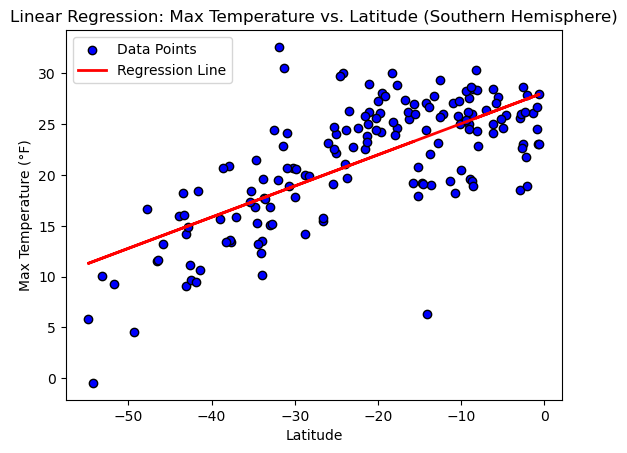

In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data from Southern Hemisphere
print(southern_hemi_df.head())

# Define the dependent and independent variables for linear regression
# Independent variable: Latitude
# Dependent variable: Max Temp (Temperature)

X_south = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
y_south = southern_hemi_df['Max Temp'].values  # Max Temp (Temperature)

# Create a linear regression model
linreg_south = LinearRegression()

# Fit the model
linreg_south.fit(X_south, y_south)

# Predict the values
y_pred_south = linreg_south.predict(X_south)

# Plot the data points and the regression line
plt.scatter(X_south, y_south, color='blue', edgecolors='black', label='Data Points')
plt.plot(X_south, y_pred_south, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Linear Regression: Max Temperature vs. Latitude (Southern Hemisphere)')

# Show the plot
plt.legend()
plt.savefig("output_data/Southern_Hemisphere_Regression.png")  # Save the figure
plt.show()


In summary, temperature tends to show the most consistent linear relationship with latitude, with warmer temperatures near the equator and cooler temperatures at the poles. Other weather variables, such as humidity, cloudiness, and wind speed, show more complex or weaker linear relationships with latitude due to additional factors like proximity to water bodies, local weather systems, and altitude. While latitude plays a significant role, it is clear that other geographic and climatic factors must also be considered to fully understand these relationships.

### Wind Speed vs. Latitude Linear Regression Plot

                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0             dingcheng  32.1272  115.0394     14.97        79           0   
1                 crane  31.3974 -102.3501     23.82        12           0   
3         betio village   1.3580  172.9211     31.02        73          78   
4        cabo san lucas  22.8909 -109.9124     26.17        65           0   
5            whitehorse  60.7161 -135.0538      0.01        74         100   

         Wind Speed Country        Date  
City_ID                                  
0              3.43      CN  1731276982  
1              3.08      US  1731276984  
3              7.90      KI  1731276986  
4              2.57      MX  1731276987  
5              5.66      CA  1731276988  


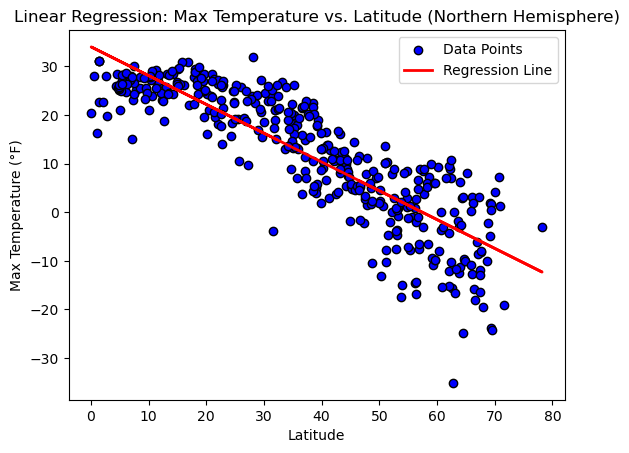

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data from Northern Hemisphere
print(northern_hemi_df.head())

# Define the dependent and independent variables for linear regression
# Independent variable: Latitude
# Dependent variable: Max Temp (Temperature)

X_north = northern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
y_north = northern_hemi_df['Max Temp'].values  # Max Temp (Temperature)

# Create a linear regression model
linreg_north = LinearRegression()

# Fit the model
linreg_north.fit(X_north, y_north)

# Predict the values
y_pred_north = linreg_north.predict(X_north)

# Plot the data points and the regression line
plt.scatter(X_north, y_north, color='blue', edgecolors='black', label='Data Points')
plt.plot(X_north, y_pred_north, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Linear Regression: Max Temperature vs. Latitude (Northern Hemisphere)')

# Show the plot
plt.legend()
plt.savefig("output_data/Northern_Hemisphere_Regression.png")  # Save the figure
plt.show()


                      City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
2          aguas vermelhas -15.7472  -41.4600     19.22        97          96   
7           port elizabeth -33.9180   25.5701     13.51        95           0   
9        port-aux-francais -49.3500   70.2167      4.52        85          61   
10                hermanus -34.4187   19.2345     13.22        82          83   
15                waitangi -43.9535 -176.5597     16.01        96         100   

         Wind Speed Country        Date  
City_ID                                  
2              2.46      BR  1731276985  
7              2.06      ZA  1731276991  
9             10.37      TF  1731276993  
10             4.12      ZA  1731276994  
15             4.47      NZ  1731277000  


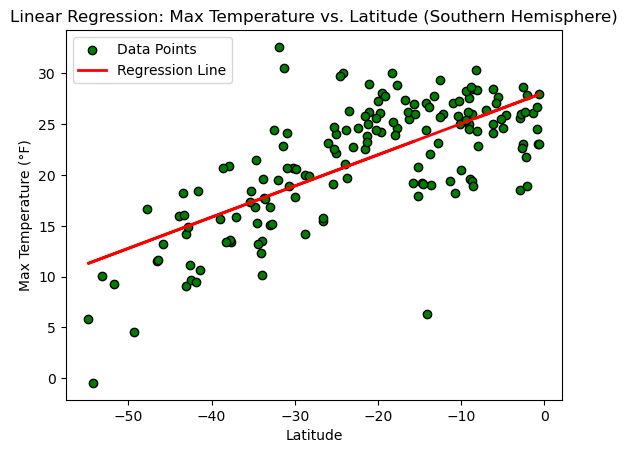

In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data from Southern Hemisphere
print(southern_hemi_df.head())

# Define the dependent and independent variables for linear regression
# Independent variable: Latitude
# Dependent variable: Max Temp (Temperature)

X_south = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Latitude
y_south = southern_hemi_df['Max Temp'].values  # Max Temp (Temperature)

# Create a linear regression model
linreg_south = LinearRegression()

# Fit the model
linreg_south.fit(X_south, y_south)

# Predict the values
y_pred_south = linreg_south.predict(X_south)

# Plot the data points and the regression line
plt.scatter(X_south, y_south, color='green', edgecolors='black', label='Data Points')
plt.plot(X_south, y_pred_south, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Linear Regression: Max Temperature vs. Latitude (Southern Hemisphere)')

# Show the plot
plt.legend()
plt.savefig("output_data/Southern_Hemisphere_Regression.png")  # Save the figure
plt.show()


Overall, the linear relationships between latitude and weather variables show some expected trends but also reveal complexities due to additional geographic and environmental factors. Temperature typically shows the strongest linear relationship with latitude, while humidity, cloudiness, and wind speed are more influenced by factors such as proximity to water bodies, atmospheric pressure, and seasonal variations. Understanding these relationships requires considering not just latitude, but also local climate and geography.